# YARA Essentials for Every Day Use

Taking a little step back with this week's post, looking at some tools that have made my life as a YARA user easier (beyond the framework itself) 

## 1. A Good Text Editor

Really any text editor will work for writing yara rules, but a number of text editors have YARA syntax highlighting which is really helpful. Not only do these features make it easy to know whether you have incorrectly quoted, or indented, they also allow for hot-key usage to create rules:

![](https://packagecontrol.io/readmes/img/9a27b3d4e8880cbd5b23a8b45897c589c1c1077a.gif)

To be honest, not having to think about the layout of the rule before I write it saves a ton of headaches. I am an Atom user (RIP) but [Notepad++](https://github.com/DissectMalware/npp-langs-4-sec), VS Code and Sublime also have such features. Long story short, VS Code automatically inserting the date is very helpful too, and ensures proper meta data practices. 

Those syntax highlighters are installed via plugins mostly; speaking of plugins, another clutch one is [TextPastry](https://github.com/duydao/Text-Pastry). TL;DR, you ever copy a blob of strings from somewhere then need to increment the number, you can do so! 

![](https://imgur.com/PWdgr2N)

## 2. A Good (Labelled) Sample Set

The Legend Steve Miller has written up a [fantastic piece on](https://stairwell.com/news/threat-research-detection-research-labeled-malware-corpus-yara-testing/) doing this exact thing with VX Underground. Having a diverse data set allows one to rapidly learn what is actually rare (urgent encouragement) and what is common (urgent correction). You can also freely download samples from MalwareBaazar (in bulk too!)

I also recommend downloading some Windows VMs and using them to [create a goodward repo](https://twitter.com/stvemillertime/status/1512053886634401795) for testing. 

Having these saved locally allows for rapid testing and iteration - long story short you don't need to test on some cloud service, you can use all of the files locally to validate at least an initial version of a detection. If you want to use a cloud service to test, I recommend [Yara Scan Service](https://riskmitigation.ch/yara-scan/) as the samples get nicely labled in a JSON blob you get back once the scan completes! Thanks Corsin :D 


## 3. A Good Triage Tool

I love [binary refinery](https://github.com/binref/refinery) for triaging any file type that crosses my desk. There are a [number of tutorials](https://github.com/binref/refinery/tree/master/tutorials) written by Jesko, the author of the tool for how best to use it. Think of it as a command line version of cyber chef with a file format explorer and parser, plus a gazillion other things. I can extract macros from a .docx file, parse the sections of a Macho, or dump out all of the overlays of multiple PEs. It has removed a ton of single use tools that I used - one binref to rule them all. Some specific features I use everyday: 

- `peek` 
- `carve` (carve is similar to a strings feature, but can look for different types: base64, printable, ints, hex, etc.) I write 70% + of my rules from this output
- `carve-filetype` (Extracts anything from the input data that looks like a certain filetype)
- `xt-filetype` (Dump out or list all of the items embedded in things like ZIPs, CABs, 7z, ISOs, and more)
- `perc` / `peoverlay` (examine overlay or resources of a given PE)
- `vsect` (examine virtual sections of a PE or ELF or MACHO)
- Various decrypting | decoding | decompression methods to further analysis

## 4. Good Analysis Tooling

Binref is awesome but there are sometimes you have to use other tooling! 

### Disassemblers 

I like using Ghidra and Binary Ninja for disassembly and decompilation. Binja for Macho's and more triage and initial analysis (plus transforms) cause its pretty, accurate and fast. Binja also has a debugger for the more rare event I do dynamic analysis :D 

I use Ghidra has the heavy weight for analyzing the functions and writing code-based rules (I learned on Ghidra so I prefer it).

### Hex Editors

I also use [010 Editor](https://www.sweetscape.com/010editor/) as a hex editor - other also like [ImHex](https://github.com/WerWolv/ImHex). The nice part about these is in depth parsing of various file formats and of course the typical hex editor things.

### FLOSS

[FLOSS](https://github.com/mandiant/flare-floss) is great for getting an idea of ASCII + Unicode (WIDE) strings from all formats. It also attempts to do some emulation on PE files to decode obfuscated strings, and find stack strings, and can point to the functions which contain those. I use this to both further my analysis (understand what stings get decrypted) and for YARA, to look at functions I could write a signature for. 

### CAPA 

[CAPA](https://github.com/mandiant/capa), Mandiant tool for assessing the functionality and capability of a PE. This is less analysis for me and finding functions that do cryptography OR interesting things I might have interest in detecting

### Exiftool

Clutch for getting only metadata about files 

### Python

Python is a mainstay for using various scripts but also for writing some of my own [YARA generation tooling](https://github.com/g-les/floss2yar)

Some Python tooling I use regularly to speed up rule writing and hypothesis testing:

#### Halogen

- [Generate rules](https://github.com/target/halogen) from images embedded in documents - thanks Kyle and Target! 

#### apooxml

- [Generate rules](https://github.com/mandiant/apooxml) for docx files based on information stored in the ZIP header data - Thanks Aaron and Mandiant gang! 

#### Ronnie
 - [Bulk analysis](https://github.com/stvemillertime/RonnieColemanYARAParser) of PE features in a pretty table! Thank you senpai Steve

#### Cerebro
 - [String mutations](https://github.com/stvemillertime/Cerebro) + obfuscations on the fly! (Again tysm Steve) 


I'll share more on daily-use utilities specific for mac malware in a coming write up! 

## 5. Random Tib Bits

Somethings I like to do that have helped speed along my rules: 

 - write a rule for each string I am interested in from a sample, to compare relative prevalence in my data
 
 ![](https://imgur.com/U8kIUol)
 
 - write a different rule for each type of detection. This way I know if the imphash vs the rich header vs the strings vs wild-carded hex bytes are firing more regularly and are creating FP/FN issues 
 
 - use the console to write most `feature` based rules for you. You can get 90% of the formatting and detection validated via console rules that also print out those facets.
    ```
    import "console"
    import "pe"
    import "hash"

    rule imphash_printer
    {

        condition:
                console.log("pe.imphash() == \"\" ", pe.imphash() )
    }


        rule richheader_printer
        {
            condition:
               console.log("hash.md5(pe.rich_signature.clear_data) == ", hash.md5(pe.rich_signature.clear_data))
        }
        

 - If you have an idea, create a rule for it! Wanna see if the NT header is worth hashing to find signal? Find out! (Hint: its not I tried) 
 

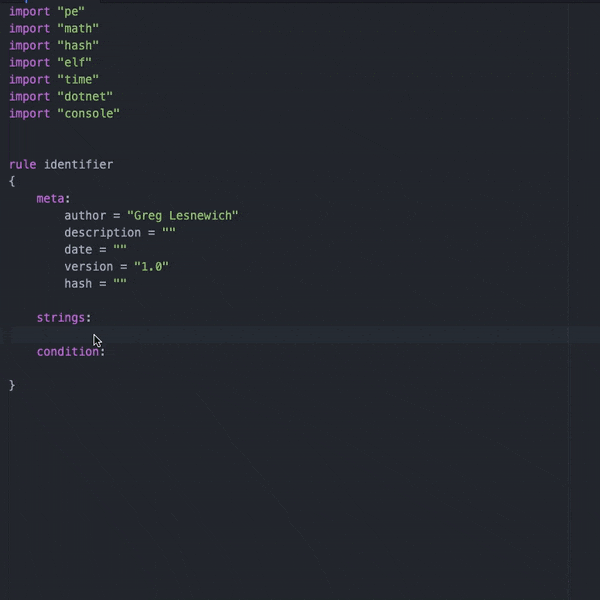